In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train) ,(X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
Y_train.shape

(50000, 1)

In [5]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
Y_train = Y_train.reshape(-1, )
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])                                 # X_train[0]
    plt.xlabel(classes[Y[index]])

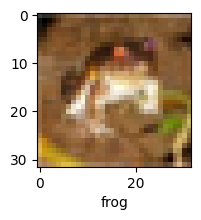

In [10]:
plot_sample(X_train, Y_train, 0)

In [11]:
X_train = X_train/255.0                                          #RGB change
X_test = X_test/255.0

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile( optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )

ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8107 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6242 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5407 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4831 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4318 - accuracy: 0.4949


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.43      0.51      1000
           1       0.69      0.51      0.59      1000
           2       0.43      0.27      0.33      1000
           3       0.29      0.48      0.36      1000
           4       0.42      0.35      0.38      1000
           5       0.38      0.36      0.37      1000
           6       0.44      0.68      0.54      1000
           7       0.66      0.43      0.52      1000
           8       0.46      0.76      0.57      1000
           9       0.65      0.43      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



### Very low accuracy from ann only 49% 

In [16]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile( optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )

In [18]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4649 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1222 - accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9956 - accuracy: 0.6520
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9211 - accuracy: 0.6789
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8598 - accuracy: 0.7025
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8052 - accuracy: 0.7198
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7548 - accuracy: 0.7372
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7071 - accuracy: 0.7536
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6671 - accuracy: 0.7690
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [19]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9371 - accuracy: 0.6966


[0.9370747208595276, 0.6966000199317932]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.14238130e-02, 5.62316236e-05, 1.13752216e-01, 2.71894515e-01,
        1.05843637e-02, 4.85780351e-02, 2.10510809e-02, 7.41180847e-05,
        5.12492120e-01, 9.35361895e-05],
       [4.37224889e-03, 3.10757477e-03, 4.64650248e-06, 7.67767432e-08,
        3.37693500e-08, 8.06327538e-09, 1.92171279e-09, 1.44645725e-07,
        9.92445290e-01, 6.99902448e-05],
       [2.13573858e-01, 5.75267226e-02, 7.22813327e-03, 6.39315695e-02,
        3.94925252e-02, 7.14821974e-03, 4.14634263e-03, 5.02148317e-03,
        5.70977509e-01, 3.09536364e-02],
       [8.18005502e-01, 5.98662533e-04, 8.82751960e-03, 5.19048749e-03,
        4.09044279e-03, 7.37127702e-05, 2.34387862e-03, 6.42190207e-05,
        1.60798565e-01, 7.02294665e-06],
       [8.29296312e-07, 1.11026736e-06, 1.53933524e-03, 9.19992570e-03,
        4.90893424e-01, 2.11250270e-03, 4.96247411e-01, 7.95084190e-07,
        4.63508331e-06, 2.02634336e-08]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [25]:
Y_test = Y_test.reshape(-1, )
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

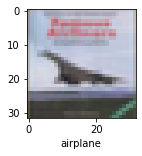

In [26]:
plot_sample(X_test, Y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
print('Classification Report: \n', classification_report(Y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.84      0.81      0.83      1000
           2       0.65      0.57      0.61      1000
           3       0.48      0.59      0.53      1000
           4       0.70      0.54      0.61      1000
           5       0.63      0.55      0.59      1000
           6       0.66      0.83      0.74      1000
           7       0.72      0.77      0.74      1000
           8       0.86      0.75      0.80      1000
           9       0.82      0.76      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

